# MUNEEB ALI (DSINT261024-XT0003)

## Project Title: Predictive Maintenance for Industrial Equipment

### i. Data Exploration and Understanding:

#### Importing Libraries:

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

In [6]:
# Ignore all warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv('DS-predictive-maintenance-data.csv')
df.head()

,Machine ID,Timestamp,Temperature,Pressure,Vibration,Operational Hours,Maintenance History,Failure
0,e0d1202e-ada0-4f29-9972-e57008e11d70,6/1/2023 11:59,55.57,146.26,4.12,16540,Yes,No
1,5b36c9d4-ec3a-4459-a408-461563caa1db,3/5/2023 3:35,87.08,459.80,2.92,3199,No,Yes
2,8a8f478c-bea8-4b9b-a8c0-004cb8034c72,5/25/2023 6:33,62.24,176.03,3.84,3989,No,No
3,c8437f2d-a812-447c-88fb-6abe325fde5b,12/30/2022 8:03,56.98,117.75,0.96,3797,No,No
4,fe8b5529-e3d3-408a-bff6-5b2fbe37393a,12/14/2022 17:22,55.12,274.42,2.64,4054,Yes,Yes


#### Checking Null Values:

In [9]:
df.isnull().sum()

Machine ID             0
Timestamp              0
Temperature            0
Pressure               0
Vibration              0
Operational Hours      0
Maintenance History    0
Failure                0
dtype: int64

#### Checking Dulicates:

In [11]:
df.duplicated().sum()

0

#### Rows and columns in dataset:

In [13]:
df.shape

(363, 8)

#### Data understanding:

In [15]:
df.info

<bound method DataFrame.info of                                Machine ID         Timestamp  Temperature  \
0    e0d1202e-ada0-4f29-9972-e57008e11d70    6/1/2023 11:59        55.57   
1    5b36c9d4-ec3a-4459-a408-461563caa1db     3/5/2023 3:35        87.08   
2    8a8f478c-bea8-4b9b-a8c0-004cb8034c72    5/25/2023 6:33        62.24   
3    c8437f2d-a812-447c-88fb-6abe325fde5b   12/30/2022 8:03        56.98   
4    fe8b5529-e3d3-408a-bff6-5b2fbe37393a  12/14/2022 17:22        55.12   
..                                    ...               ...          ...   
358  8f602544-059e-4f66-8b26-68ae4b635693   11/8/2022 18:27        79.83   
359  ba3f47b6-c263-4113-a4d1-92a6c7b46ea8  12/14/2022 12:05        67.28   
360  bc9a4948-084a-40c4-91f9-ec6340277136    1/13/2023 3:36        89.32   
361  f2140585-a6ed-400c-b3a7-895fecf612d2   11/27/2022 9:44        71.82   
362  850ba96a-eddc-449c-9e5a-e25bd239c302    2/22/2023 5:06        99.21   

     Pressure  Vibration  Operational Hours Maintenance

#### Types of columns:

In [17]:
df.dtypes

Machine ID              object
Timestamp               object
Temperature            float64
Pressure               float64
Vibration              float64
Operational Hours        int64
Maintenance History     object
Failure                 object
dtype: object

In [18]:
# In standarizing the timestamp column i founded this date wasnt be converted thats why i remove the row and reindex the dataset.
row_index = 209
specific_row = df.iloc[row_index]

# Display the specific row
print(specific_row)

Machine ID             b96be4bd-2b61-4179-b69c-077bc702bb04
Timestamp                                   1/25/2023 13:13
Temperature                                           69.52
Pressure                                              308.7
Vibration                                              1.89
Operational Hours                                     15762
Maintenance History                                      No
Failure                                                 Yes
Name: 209, dtype: object


#### Found a problem in row 304. Thats why dropping it from dataset:

In [20]:
# Step 1: Remove the row with index 304
df = df.drop(index = 304)

# Step 2: Reset the index
df = df.reset_index(drop=True)

#### Standerizing timestamp column:

In [22]:
# Step 1: Convert the 'Timestamp' to a uniform datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Check for any NaT values after conversion
if df['Timestamp'].isna().any():
    print("Rows with invalid dates:")
    print(df[df['Timestamp'].isna()])  # Show rows that couldn't be converted

# Step 2: Create separate columns for date and time
df['date'] = df['Timestamp'].dt.date  # Extract the date part
df['time'] = df['Timestamp'].dt.time  # Extract the time part

# (Optional) Reformat the Timestamp to a specific string format
# For example, you might want 'YYYY-MM-DD HH:MM:SS'
df['Standardized_Timestamp'] = df['Timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Display the result
df.head()


,Machine ID,Timestamp,Temperature,Pressure,Vibration,Operational Hours,Maintenance History,Failure,date,time,Standardized_Timestamp
0,e0d1202e-ada0-4f29-9972-e57008e11d70,2023-06-01 11:59:00,55.57,146.26,4.12,16540,Yes,No,2023-06-01,11:59:00,2023-06-01 11:59:00
1,5b36c9d4-ec3a-4459-a408-461563caa1db,2023-03-05 03:35:00,87.08,459.80,2.92,3199,No,Yes,2023-03-05,03:35:00,2023-03-05 03:35:00
2,8a8f478c-bea8-4b9b-a8c0-004cb8034c72,2023-05-25 06:33:00,62.24,176.03,3.84,3989,No,No,2023-05-25,06:33:00,2023-05-25 06:33:00
3,c8437f2d-a812-447c-88fb-6abe325fde5b,2022-12-30 08:03:00,56.98,117.75,0.96,3797,No,No,2022-12-30,08:03:00,2022-12-30 08:03:00
4,fe8b5529-e3d3-408a-bff6-5b2fbe37393a,2022-12-14 17:22:00,55.12,274.42,2.64,4054,Yes,Yes,2022-12-14,17:22:00,2022-12-14 17:22:00


In [23]:
df.insert(2, 'Standardized_Timestamp', df.pop('Standardized_Timestamp'))
df.insert(3, 'date', df.pop('date'))
df.insert(4, 'time', df.pop('time'))

df.columns

Index(['Machine ID', 'Timestamp', 'Standardized_Timestamp', 'date', 'time',
       'Temperature', 'Pressure', 'Vibration', 'Operational Hours',
       'Maintenance History', 'Failure'],
      dtype='object')

In [24]:
df.dtypes

Machine ID                        object
Timestamp                 datetime64[ns]
Standardized_Timestamp            object
date                              object
time                              object
Temperature                      float64
Pressure                         float64
Vibration                        float64
Operational Hours                  int64
Maintenance History               object
Failure                           object
dtype: object

#### Converting columns into numerical for modelling:

In [26]:
# Convert 'Timestamp' to numerical values (e.g., using Unix timestamp)
df['Standardized_Timestamp'] = pd.to_datetime(df['Timestamp']).astype('int64') // 10**9  # Convert to Unix timestamp

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Convert to datetime, handle errors

# Convert 'time' column from datetime.time to seconds
if df['time'].dtype == 'object':
    df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S', errors='coerce').dt.hour * 3600 + \
                 pd.to_datetime(df['time'], format='%H:%M:%S', errors='coerce').dt.minute * 60 + \
                 pd.to_datetime(df['time'], format='%H:%M:%S', errors='coerce').dt.second

# Convert 'Maintenance History' and 'Failure' to numerical values using Label Encoding
label_encoder = LabelEncoder()

# Encode categorical columns
df['Maintenance History'] = label_encoder.fit_transform(df['Maintenance History'])
df['Failure'] = label_encoder.fit_transform(df['Failure'])

# Check the data types of the columns after conversion
print(df.dtypes)

# Display the updated DataFrame
df.head()

Machine ID                        object
Timestamp                 datetime64[ns]
Standardized_Timestamp             int64
date                      datetime64[ns]
time                               int32
Temperature                      float64
Pressure                         float64
Vibration                        float64
Operational Hours                  int64
Maintenance History                int32
Failure                            int32
dtype: object


,Machine ID,Timestamp,Standardized_Timestamp,date,time,Temperature,Pressure,Vibration,Operational Hours,Maintenance History,Failure
0,e0d1202e-ada0-4f29-9972-e57008e11d70,2023-06-01 11:59:00,1685620740,2023-06-01,43140,55.57,146.26,4.12,16540,1,0
1,5b36c9d4-ec3a-4459-a408-461563caa1db,2023-03-05 03:35:00,1677987300,2023-03-05,12900,87.08,459.80,2.92,3199,0,1
2,8a8f478c-bea8-4b9b-a8c0-004cb8034c72,2023-05-25 06:33:00,1684996380,2023-05-25,23580,62.24,176.03,3.84,3989,0,0
3,c8437f2d-a812-447c-88fb-6abe325fde5b,2022-12-30 08:03:00,1672387380,2022-12-30,28980,56.98,117.75,0.96,3797,0,0
4,fe8b5529-e3d3-408a-bff6-5b2fbe37393a,2022-12-14 17:22:00,1671038520,2022-12-14,62520,55.12,274.42,2.64,4054,1,1


### ii. Data Preprocessing

#### Extracting New Features:

In [29]:
# Group by Machine ID and calculate average temperature
df['avg_temperature'] = df.groupby('Machine ID')['Temperature'].transform('mean')

In [30]:
# Group by Machine ID and calculate the cumulative sum of vibration
df['total_vibration'] = df.groupby('Machine ID')['Vibration'].cumsum()

In [31]:
# Create a feature that shows the cumulative operational hours until failure
df['operational_hours_at_failure'] = df.groupby('Machine ID')['Operational Hours'].cumsum()

In [32]:
df.head()

,Machine ID,Timestamp,Standardized_Timestamp,date,time,Temperature,Pressure,Vibration,Operational Hours,Maintenance History,Failure,avg_temperature,total_vibration,operational_hours_at_failure
0,e0d1202e-ada0-4f29-9972-e57008e11d70,2023-06-01 11:59:00,1685620740,2023-06-01,43140,55.57,146.26,4.12,16540,1,0,55.57,4.12,16540
1,5b36c9d4-ec3a-4459-a408-461563caa1db,2023-03-05 03:35:00,1677987300,2023-03-05,12900,87.08,459.80,2.92,3199,0,1,87.08,2.92,3199
2,8a8f478c-bea8-4b9b-a8c0-004cb8034c72,2023-05-25 06:33:00,1684996380,2023-05-25,23580,62.24,176.03,3.84,3989,0,0,62.24,3.84,3989
3,c8437f2d-a812-447c-88fb-6abe325fde5b,2022-12-30 08:03:00,1672387380,2022-12-30,28980,56.98,117.75,0.96,3797,0,0,56.98,0.96,3797
4,fe8b5529-e3d3-408a-bff6-5b2fbe37393a,2022-12-14 17:22:00,1671038520,2022-12-14,62520,55.12,274.42,2.64,4054,1,1,55.12,2.64,4054


## iii. Exploratory Data Analysis (EDA):

In [34]:
df.columns

Index(['Machine ID', 'Timestamp', 'Standardized_Timestamp', 'date', 'time',
       'Temperature', 'Pressure', 'Vibration', 'Operational Hours',
       'Maintenance History', 'Failure', 'avg_temperature', 'total_vibration',
       'operational_hours_at_failure'],
      dtype='object')

#### Histograms:

- Show the distribution of numerical features.

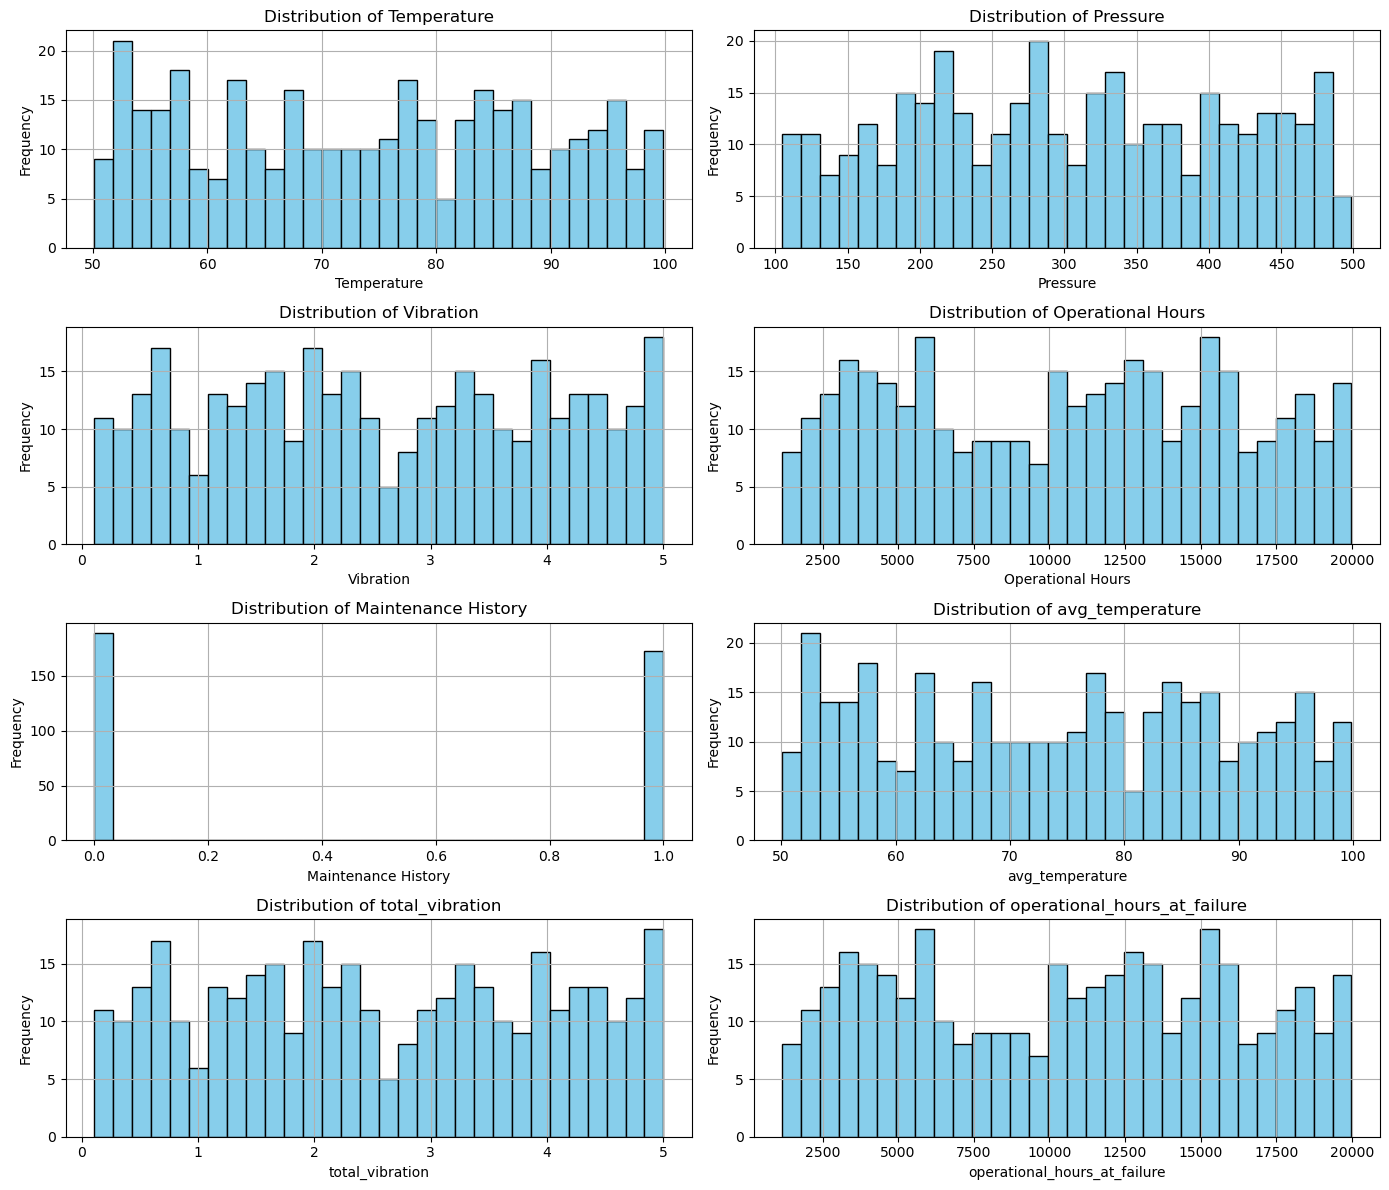

In [37]:
# Define the list of columns to visualize
columns = ['Temperature', 'Pressure', 'Vibration', 'Operational Hours', 
           'Maintenance History', 'avg_temperature', 'total_vibration',
           'operational_hours_at_failure']

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(14, 12))  # 4 rows and 2 columns for 8 features
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Loop through columns and axes to plot histograms
for i, col in enumerate(columns):
    axes[i].hist(df[col], bins=30, edgecolor='black', color='skyblue')
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)  # Add gridlines for better readability

# Hide the last subplot if there are fewer than 8 features
if len(columns) < 8:
    axes[len(columns)].axis('off')

# Adjust layout for a neat appearance
plt.tight_layout()

# Show the plots
plt.show()

#### Correlation Matrix:

Correlation with 'Failure':
 Failure                         1.000000
Operational Hours               0.039156
operational_hours_at_failure    0.039156
Pressure                        0.037034
Temperature                     0.030924
avg_temperature                 0.030924
Maintenance History             0.011305
Vibration                      -0.066158
total_vibration                -0.066158
Name: Failure, dtype: float64


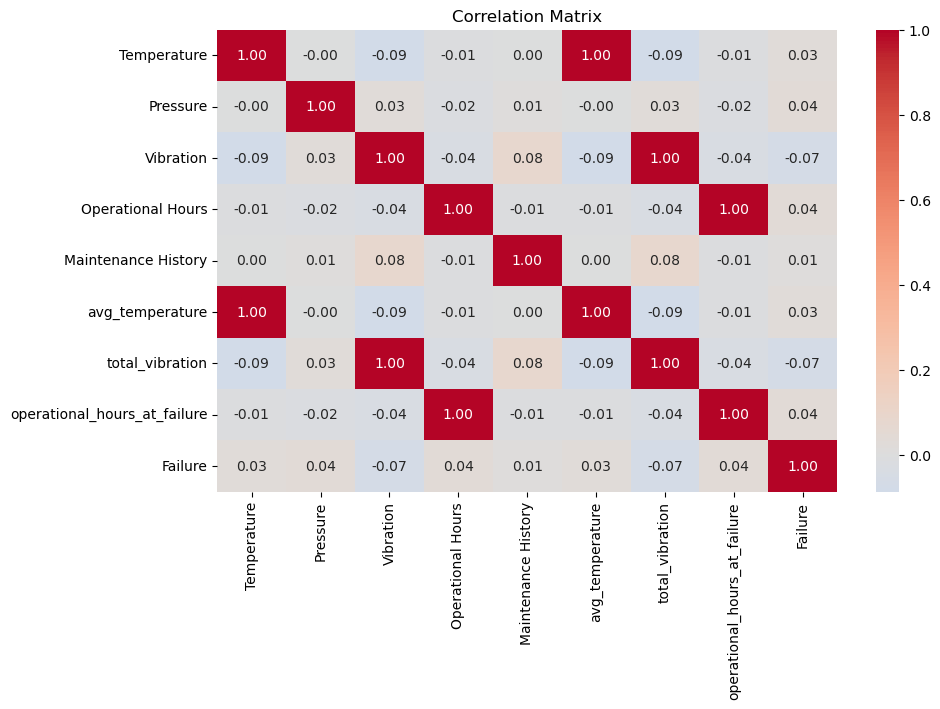

In [39]:
# Define the columns of interest
columns_of_interest = ['Temperature', 'Pressure', 'Vibration', 'Operational Hours', 
                        'Maintenance History', 'avg_temperature', 'total_vibration',
                        'operational_hours_at_failure', 'Failure']

# Create a new DataFrame with the specified columns
df_subset = df[columns_of_interest]

# Compute the correlation matrix
correlation_matrix = df_subset.corr()

# Extract correlations with the target variable 'Failure'
correlation_with_failure = correlation_matrix['Failure'].sort_values(ascending=False)

# Display the correlations of features with 'Failure'
print("Correlation with 'Failure':\n", correlation_with_failure)

# Visualize the correlation with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('Correlation Matrix')
plt.show()


#### Pair Plots: 

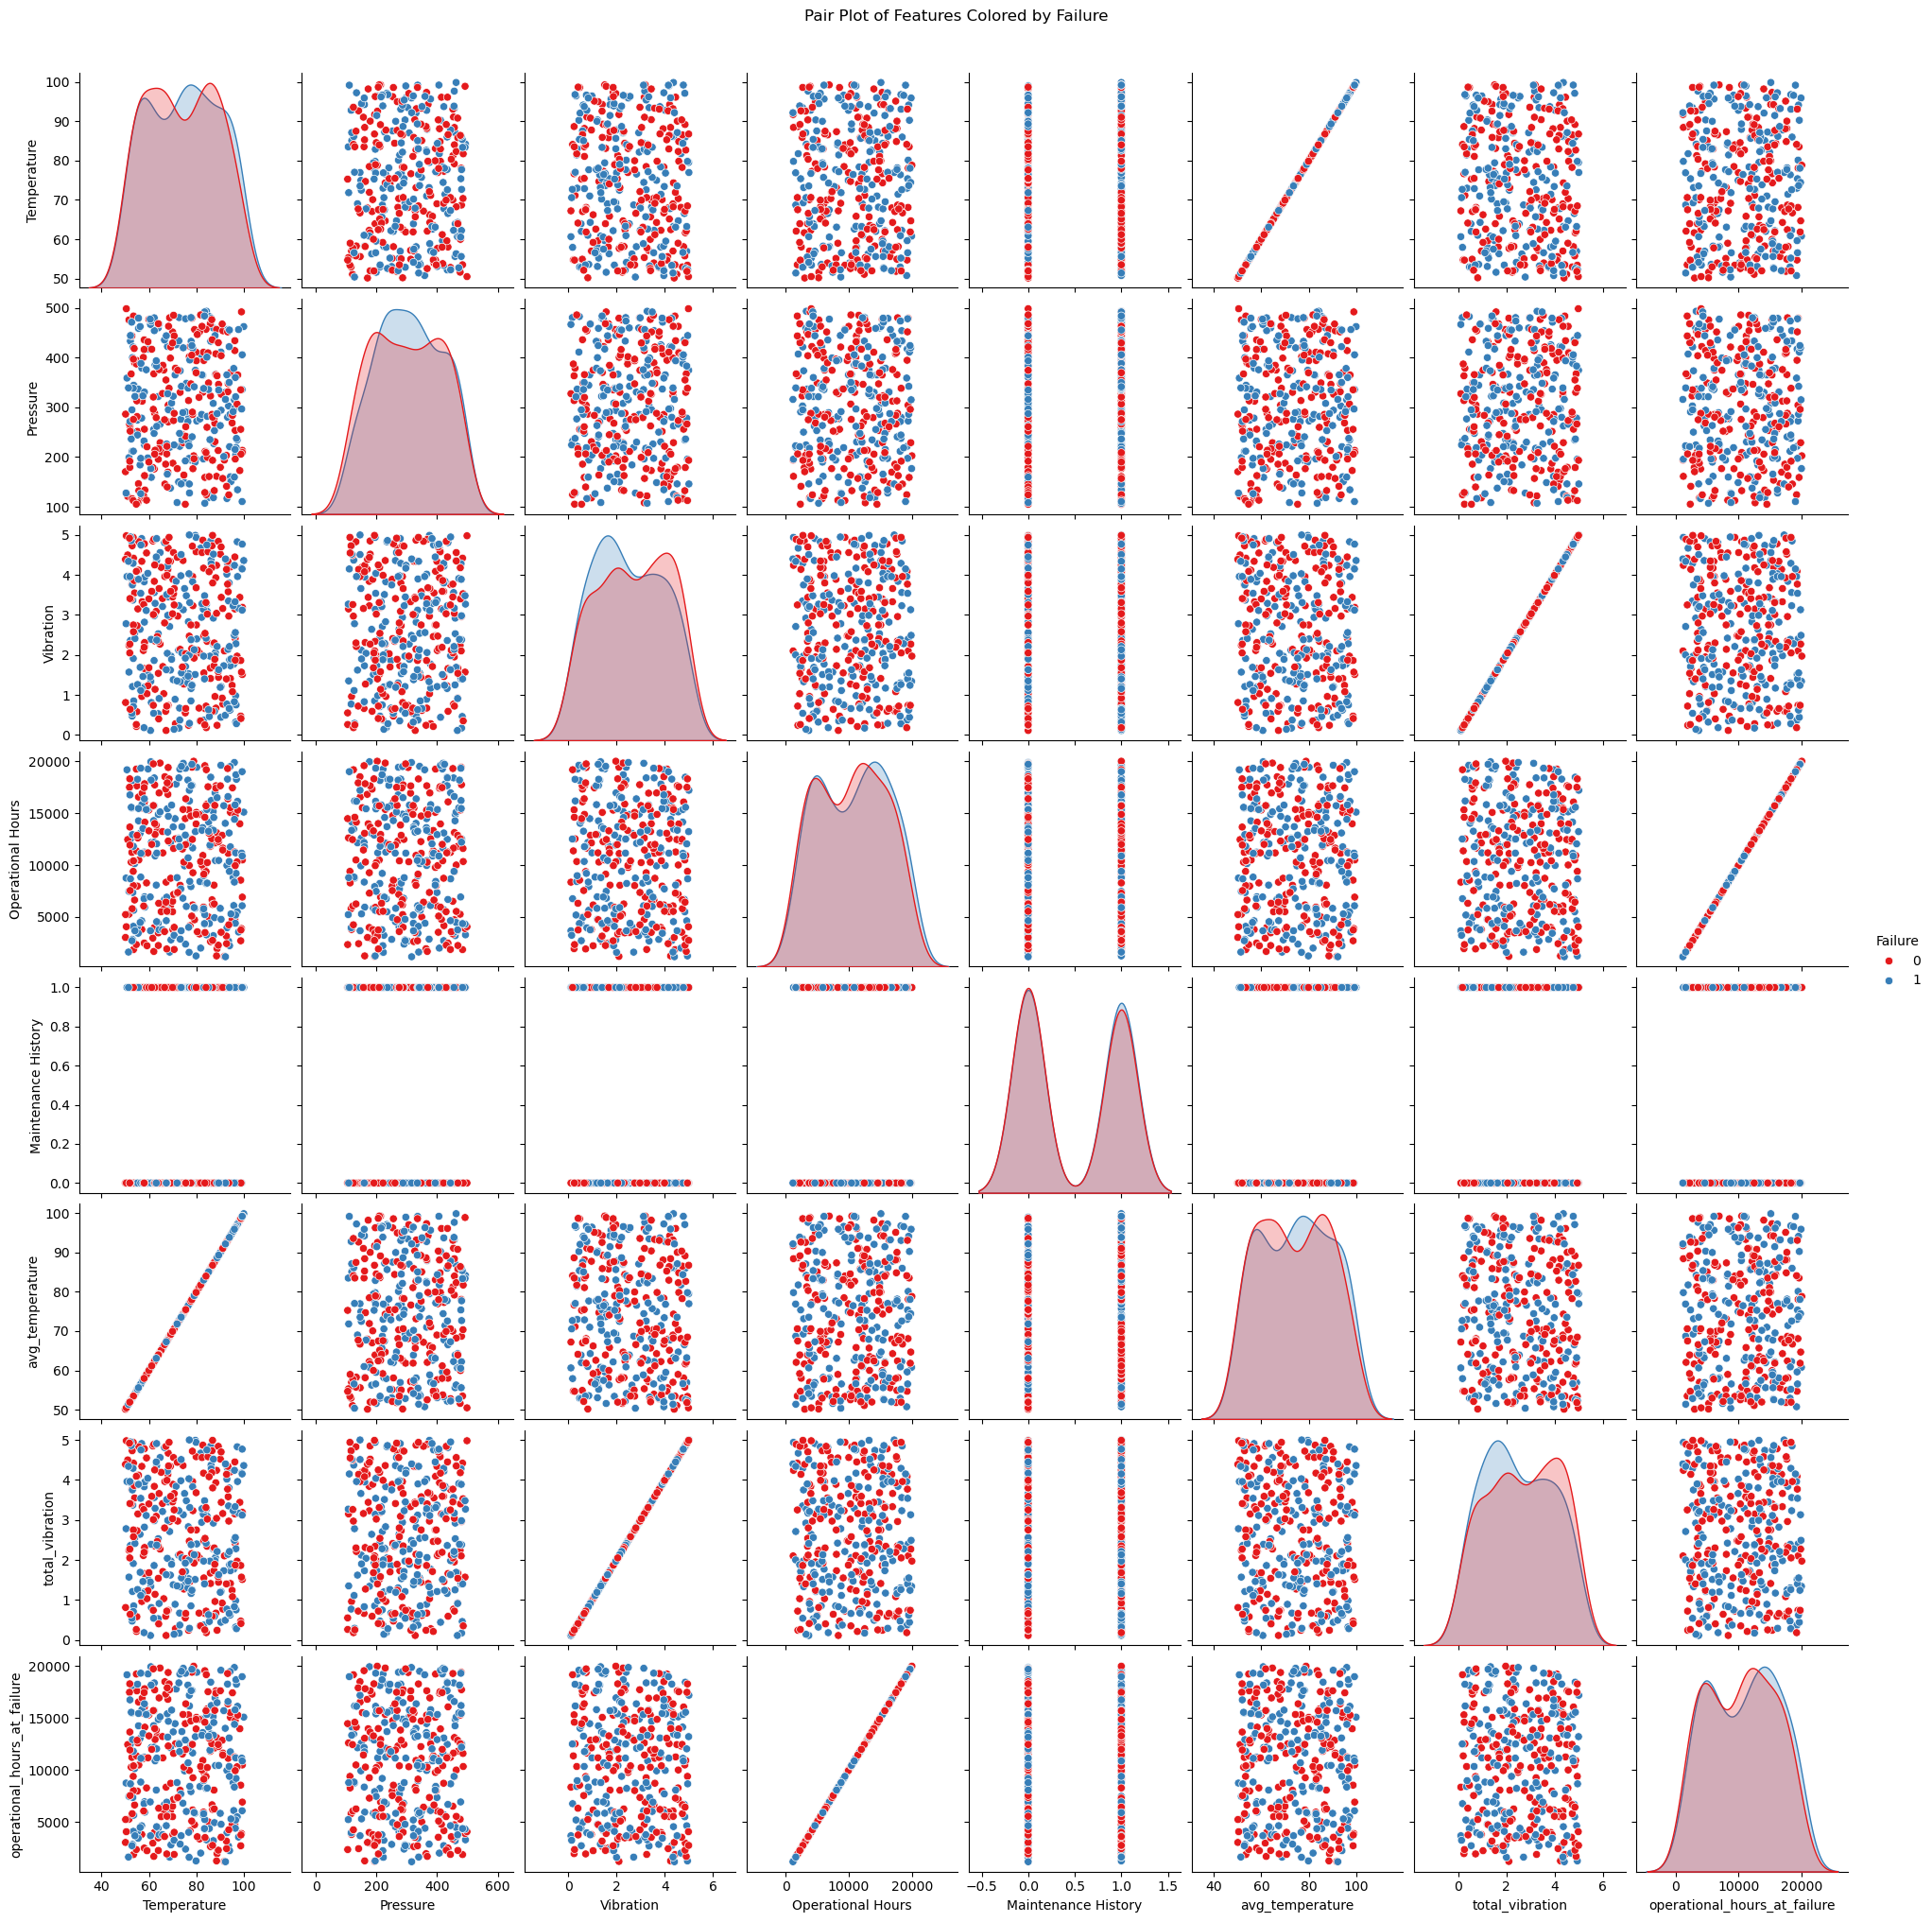

In [41]:
# Define the columns of interest including the target
columns_of_interest = ['Temperature', 'Pressure', 'Vibration', 'Operational Hours', 
                        'Maintenance History', 'avg_temperature', 'total_vibration',
                        'operational_hours_at_failure', 'Failure']

# Create a pair plot
sns.pairplot(df[columns_of_interest], hue='Failure', palette='Set1')
plt.suptitle('Pair Plot of Features Colored by Failure', y=1.02)
plt.show()
('Vibration vs. Temperature by Failure Status')
plt.show()

#### Box Plot for Outlier Detection

- Box plots are used to visually show the distribution of numerical data and detect potential outliers.

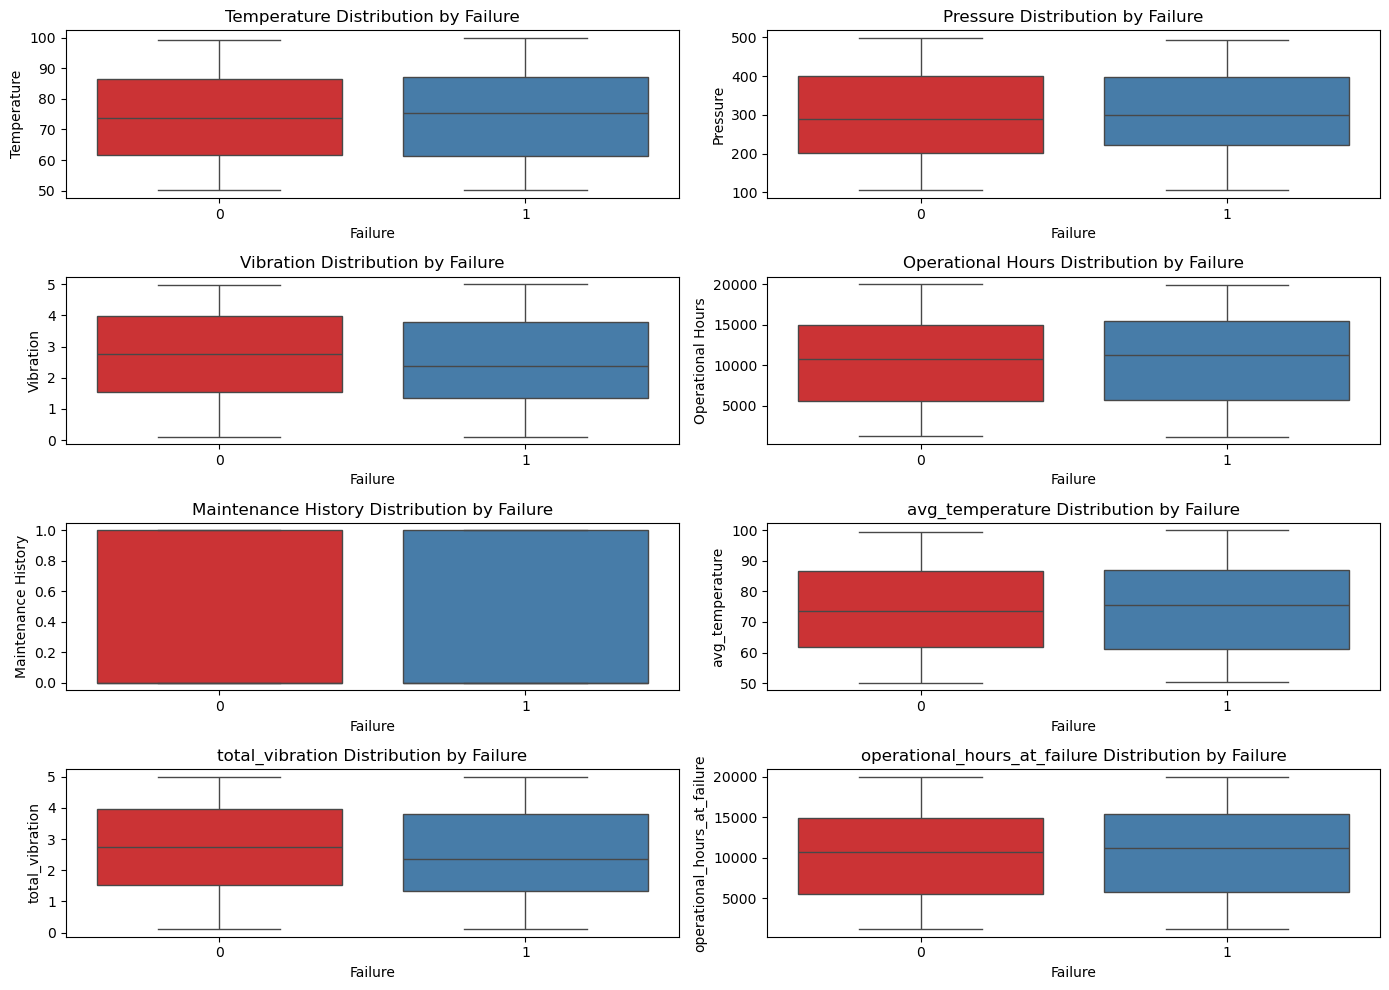

In [44]:
# Set the figure size
plt.figure(figsize=(14, 10))

# Create a box plot for each feature against 'Failure'
for i, col in enumerate(columns_of_interest[:-1]):  # Exclude 'Failure' from plotting
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x='Failure', y=col, data=df, palette='Set1')
    plt.title(f'{col} Distribution by Failure', fontsize=12)
    plt.xlabel('Failure')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


#### Violin Plots:

- Offers a richer view of the data distribution and can highlight variations in feature distributions across different failure states.

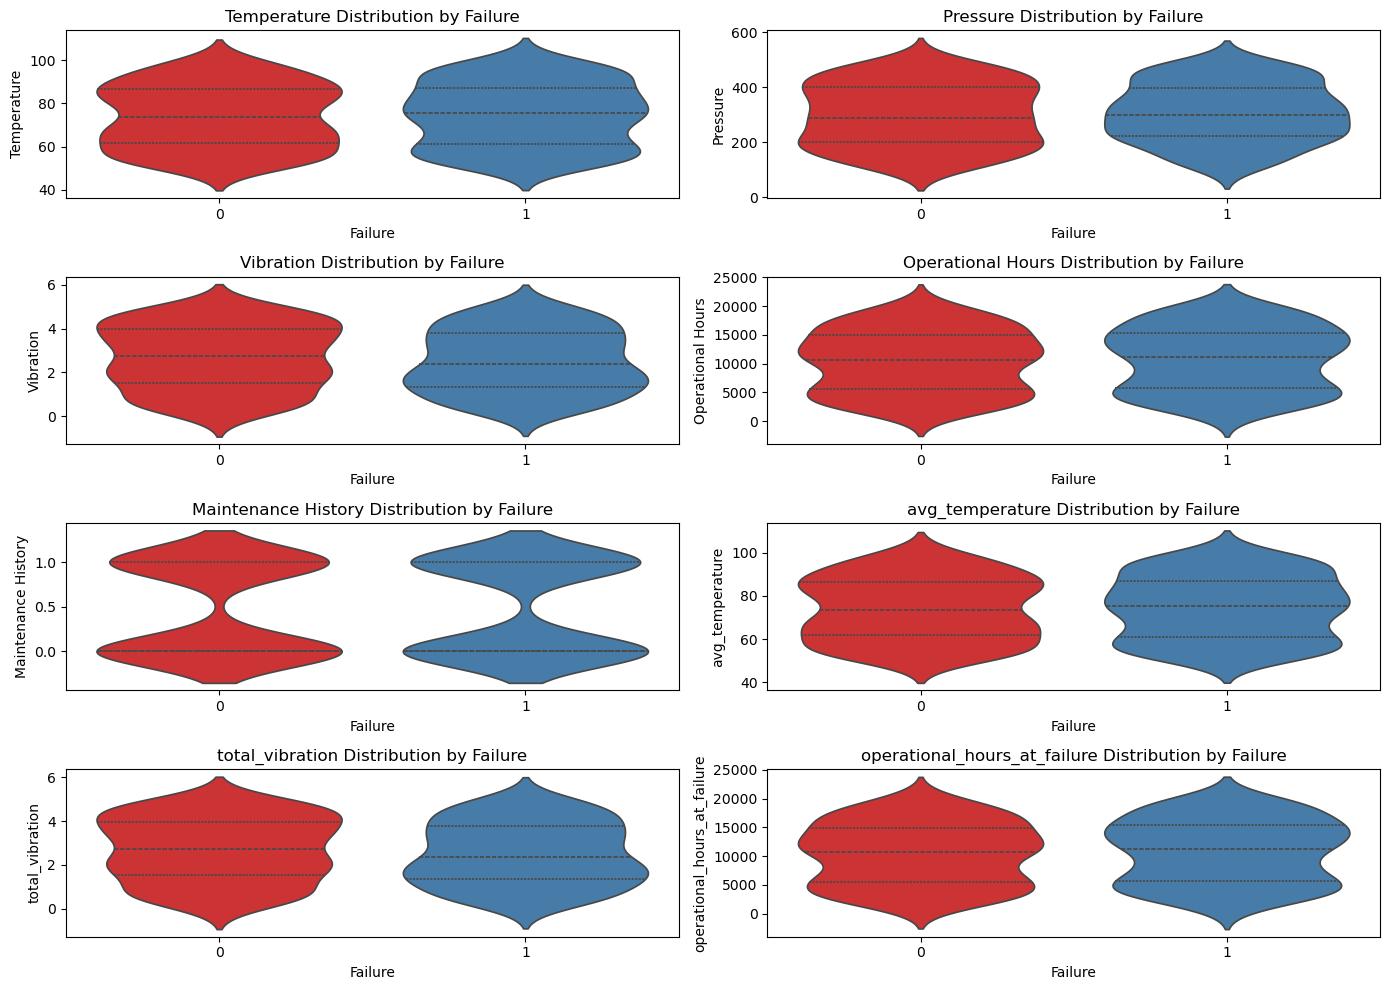

In [47]:
# Set the figure size
plt.figure(figsize=(14, 10))

# Create a violin plot for each feature against 'Failure'
for i, col in enumerate(columns_of_interest[:-1]):  # Exclude 'Failure' from plotting
    plt.subplot(4, 2, i + 1)
    sns.violinplot(x='Failure', y=col, data=df, palette='Set1', inner='quartile')
    plt.title(f'{col} Distribution by Failure', fontsize=12)
    plt.xlabel('Failure')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


### iv. Model Building

In [49]:
df.columns

Index(['Machine ID', 'Timestamp', 'Standardized_Timestamp', 'date', 'time',
       'Temperature', 'Pressure', 'Vibration', 'Operational Hours',
       'Maintenance History', 'Failure', 'avg_temperature', 'total_vibration',
       'operational_hours_at_failure'],
      dtype='object')

In [50]:
#Machine ID	Timestamp	Standardized_Timestamp	date	time	
X = df.drop(columns=['Failure','Machine ID','Timestamp','Standardized_Timestamp','date','time'])  # Drop the target column
y = df['Failure']  # Target column

#### Split the dataset into training (80%) and testing (20%) sets

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
X_train.head()

,Temperature,Pressure,Vibration,Operational Hours,Maintenance History,avg_temperature,total_vibration,operational_hours_at_failure
209,69.52,308.70,1.89,15762,0,69.52,1.89,15762
337,67.48,206.25,0.72,1923,0,67.48,0.72,1923
356,51.91,191.57,2.05,18294,0,51.91,2.05,18294
75,94.23,153.34,4.20,15519,1,94.23,4.20,15519
84,68.10,270.70,4.67,12310,1,68.10,4.67,12310


#### Scaling the features

In [55]:
# Feature scaling (especially important for algorithms like SVM and Neural Networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Logistic Regression:

In [57]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_log_reg)
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)
f1 = f1_score(y_test, y_pred_log_reg)

# Print metrics
print("Logistic Regression Model Evaluation Metrics:")
print("-" * 40)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Logistic Regression Model Evaluation Metrics:
----------------------------------------
Accuracy: 0.49
Precision: 0.56
Recall: 0.44
F1 Score: 0.49


##### Random Forest Classifier

In [59]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

# Print metrics
print("Random Forest Classifier Model Evaluation Metrics:")
print("-" * 40)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Random Forest Classifier Model Evaluation Metrics:
----------------------------------------
Accuracy: 0.52
Precision: 0.57
Recall: 0.59
F1 Score: 0.58


##### Gradient Boosting Classifier

In [61]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb)
recall = recall_score(y_test, y_pred_gb)
f1 = f1_score(y_test, y_pred_gb)

# Print metrics
print("Gradient Boosting Classifier Model Evaluation Metrics:")
print("-" * 40)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Gradient Boosting Classifier Model Evaluation Metrics:
----------------------------------------
Accuracy: 0.47
Precision: 0.53
Recall: 0.46
F1 Score: 0.49


##### Support Vector Machine

In [63]:
# Support Vector Machine
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

# Print metrics
print("Support Vector Machine Model Evaluation Metrics:")
print("-" * 40)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Support Vector Machine Model Evaluation Metrics:
----------------------------------------
Accuracy: 0.44
Precision: 0.50
Recall: 0.46
F1 Score: 0.48


In [64]:
# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

# Print metrics
print("K-Nearest Neighbors Model Evaluation Metrics:")
print("-" * 40)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

K-Nearest Neighbors Model Evaluation Metrics:
----------------------------------------
Accuracy: 0.58
Precision: 0.63
Recall: 0.59
F1 Score: 0.61


##### Visualizing Model Accuracies:

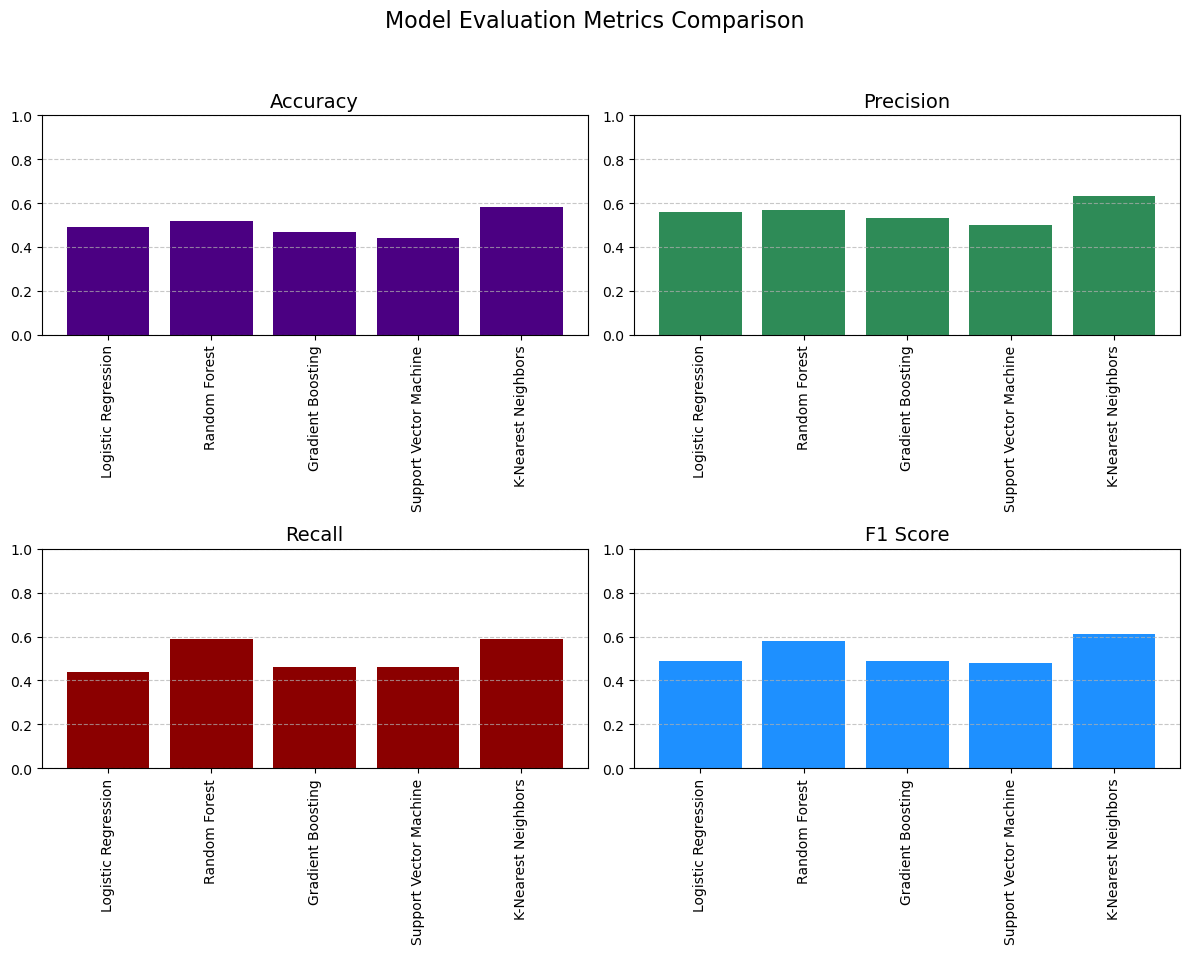

In [66]:
# Define the model names and their respective metrics
models = [
    'Logistic Regression',
    'Random Forest',
    'Gradient Boosting',
    'Support Vector Machine',
    'K-Nearest Neighbors'
]

accuracy = [0.49, 0.52, 0.47, 0.44, 0.58]
precision = [0.56, 0.57, 0.53, 0.50, 0.63]
recall = [0.44, 0.59, 0.46, 0.46, 0.59]
f1_score = [0.49, 0.58, 0.49, 0.48, 0.61]

# Set the x locations for the models
x = np.arange(len(models))

# Create subplots for each metric
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Model Evaluation Metrics Comparison', fontsize=16)

# Accuracy Bar Plot with dark color
axs[0, 0].bar(x, accuracy, color='#4B0082')  # Indigo
axs[0, 0].set_title('Accuracy', fontsize=14)
axs[0, 0].set_ylim(0, 1)
axs[0, 0].grid(axis='y', linestyle='--', alpha=0.7)
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(models, rotation=90)  # Rotate x-tick labels

# Precision Bar Plot with dark color
axs[0, 1].bar(x, precision, color='#2E8B57')  # SeaGreen
axs[0, 1].set_title('Precision', fontsize=14)
axs[0, 1].set_ylim(0, 1)
axs[0, 1].grid(axis='y', linestyle='--', alpha=0.7)
axs[0, 1].set_xticks(x)
axs[0, 1].set_xticklabels(models, rotation=90)  # Rotate x-tick labels

# Recall Bar Plot with dark color
axs[1, 0].bar(x, recall, color='#8B0000')  # DarkRed
axs[1, 0].set_title('Recall', fontsize=14)
axs[1, 0].set_ylim(0, 1)
axs[1, 0].grid(axis='y', linestyle='--', alpha=0.7)
axs[1, 0].set_xticks(x)
axs[1, 0].set_xticklabels(models, rotation=90)  # Rotate x-tick labels

# F1 Score Bar Plot with dark color
axs[1, 1].bar(x, f1_score, color='#1E90FF')  # DodgerBlue
axs[1, 1].set_title('F1 Score', fontsize=14)
axs[1, 1].set_ylim(0, 1)
axs[1, 1].grid(axis='y', linestyle='--', alpha=0.7)
axs[1, 1].set_xticks(x)
axs[1, 1].set_xticklabels(models, rotation=90)  # Rotate x-tick labels

# Adjust layout for better appearance
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for the main title

# Show the plots
plt.show()


### V. Testing Model on features values:

In [68]:
# Define the features for prediction
input_features_knn = np.array([[94.23, 153.34, 4.20, 15519, 1, 94.23, 4.20, 15519]])

# Make prediction using the trained KNN model
y_pred_knn = knn.predict(input_features_knn)

# Get the predicted probabilities for each class
y_pred_proba_knn = knn.predict_proba(input_features_knn)

# Check the predicted probabilities
prob_failure = y_pred_proba_knn[0][1]  # Probability of failure
prob_no_failure = y_pred_proba_knn[0][0]  # Probability of no failure

# Define the machine maintenance status based on the input features
maintenance_history_input = input_features_knn[0][4]  # Assuming Maintenance History is the 5th feature
maintenance_status = "Yes" if maintenance_history_input == 1 else "No"

# Interpret the predicted class and maintenance actions
if prob_failure > 0.7:
    maintenance_action = "Immediate maintenance required."
    prediction_result = "The machine is predicted to fail."
elif prob_failure > 0.4:
    maintenance_action = "Schedule maintenance soon."
    prediction_result = "The machine is predicted to operate normally but needs maintenance."
else:
    maintenance_action = "Operate normally, but monitor closely."
    prediction_result = "The machine is predicted to operate normally without any maintenance needed."

# Determine the predicted class message
predicted_class_message = "Failure" if y_pred_knn[0] == 1 else "No Failure"

# Enhanced output
print("\n--- Maintenance Prediction Report ---\n")
print(f"Predicted Class: {predicted_class_message}\n")
print(f"Prediction Result: {prediction_result}\n")
print(f"Recommended Action: {maintenance_action}\n")
print(f"Probability of Failure: {prob_failure:.2f} ({prob_failure * 100:.1f}%)\n")
print(f"Probability of No Failure: {prob_no_failure:.2f} ({prob_no_failure * 100:.1f}%)\n")
print("---------------------------------------\n")



--- Maintenance Prediction Report ---

Predicted Class: No Failure

Prediction Result: The machine is predicted to operate normally without any maintenance needed.

Recommended Action: Operate normally, but monitor closely.

Probability of Failure: 0.40 (40.0%)

Probability of No Failure: 0.60 (60.0%)

---------------------------------------



In [69]:
# Define the features for prediction
input_features_knn = np.array([[69.52, 308.70, 1.89, 15762, 0, 69.52, 1.89, 15762]])

# Make prediction using the trained KNN model
y_pred_knn = knn.predict(input_features_knn)

# Get the predicted probabilities for each class
y_pred_proba_knn = knn.predict_proba(input_features_knn)

# Check the predicted probabilities
prob_failure = y_pred_proba_knn[0][1]  # Probability of failure
prob_no_failure = y_pred_proba_knn[0][0]  # Probability of no failure

# Define the machine maintenance status based on the input features
maintenance_history_input = input_features_knn[0][4]  # Assuming Maintenance History is the 5th feature
maintenance_status = "Yes" if maintenance_history_input == 1 else "No"

# Interpret the predicted class and maintenance actions
if prob_failure > 0.7:
    maintenance_action = "Immediate maintenance required."
    prediction_result = "The machine is predicted to fail."
elif prob_failure > 0.4:
    maintenance_action = "Schedule maintenance soon."
    prediction_result = "The machine is predicted to operate normally but needs maintenance."
else:
    maintenance_action = "Operate normally, but monitor closely."
    prediction_result = "The machine is predicted to operate normally without any maintenance needed."

# Determine the predicted class message
predicted_class_message = "Failure" if y_pred_knn[0] == 1 else "No Failure"

# Enhanced output
print("\n--- Maintenance Prediction Report ---\n")
print(f"Predicted Class: {predicted_class_message}\n")
print(f"Prediction Result: {prediction_result}\n")
print(f"Recommended Action: {maintenance_action}\n")
print(f"Probability of Failure: {prob_failure:.2f} ({prob_failure * 100:.1f}%)\n")
print(f"Probability of No Failure: {prob_no_failure:.2f} ({prob_no_failure * 100:.1f}%)\n")
print("---------------------------------------\n")



--- Maintenance Prediction Report ---

Predicted Class: Failure

Prediction Result: The machine is predicted to operate normally but needs maintenance.

Recommended Action: Schedule maintenance soon.

Probability of Failure: 0.60 (60.0%)

Probability of No Failure: 0.40 (40.0%)

---------------------------------------

